In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.resnet import *
from keras.datasets.cifar100 import load_data
import keras
from keras import layers

Using TensorFlow backend.


In [2]:
import sys
sys.path.append("../src/")
from honest_dnn import HonestDNN

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train[:, 0], y_test[:, 0]
train_instances, test_instances = np.where(y_train < 10)[0], np.where(y_test < 10)[0]
X_train, y_train = X_train[train_instances], y_train[train_instances]
X_test, y_test = X_test[test_instances], y_test[test_instances]

In [4]:
lenet = keras.Sequential()
lenet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=np.shape(X_train)[1:]))
lenet.add(layers.AveragePooling2D())
lenet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
lenet.add(layers.AveragePooling2D())
lenet.add(layers.Flatten())

In [5]:
custom = keras.Sequential()
custom.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=np.shape(X_train)[1:]))
custom.add(layers.BatchNormalization())
custom.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides = 2, padding = "same", activation='relu'))
custom.add(layers.BatchNormalization())
custom.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides = 2, padding = "same", activation='relu'))
custom.add(layers.BatchNormalization())
custom.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides = 2, padding = "same", activation='relu'))
custom.add(layers.BatchNormalization())
custom.add(layers.Conv2D(filters=254, kernel_size=(3, 3), strides = 2, padding = "same", activation='relu'))

custom.add(layers.Flatten())

In [6]:
resnet50 = ResNet50(input_shape=np.shape(X_train)[1:], pooling='max', weights=None, include_top=False)
resnet101 = ResNet101(input_shape=np.shape(X_train)[1:], pooling='max', weights=None, include_top=False)
resnet152 = ResNet152(input_shape=np.shape(X_train)[1:], pooling='max', weights=None, include_top=False)

In [7]:
backbones = [lenet, custom, resnet50, resnet101, resnet152]
backbone_names = ["LeNet", "Tolias", "ResNet50", "ResNet101", "ResNet152"]

In [8]:
accs_across_backbones = []
for backbone_idx in range(len(backbones)):
    backbone = backbones[backbone_idx]
    dnn = HonestDNN(backbone = backbone)
    dnn.fit(X_train, y_train, epochs = 100)
    test_preds = dnn.predict(X_test)
    test_acc = np.mean(test_preds == y_test)
    print("Test Acc For Backbone {}: {}".format(backbone_names[backbone_idx], test_acc))
    accs_across_backbones.append(test_acc)

Train on 2847 samples, validate on 503 samples
Epoch 1/100
2847/2847 [==============================] - 2s 846us/step - loss: 8.5278 - acc: 0.1229 - val_loss: 4.5475 - val_acc: 0.1571

Epoch 00001: val_acc improved from -inf to 0.15706, saving model to best_model.h5
Epoch 2/100
2847/2847 [==============================] - 0s 131us/step - loss: 3.5100 - acc: 0.2157 - val_loss: 3.3440 - val_acc: 0.1988

Epoch 00002: val_acc improved from 0.15706 to 0.19881, saving model to best_model.h5
Epoch 3/100
2847/2847 [==============================] - 0s 132us/step - loss: 2.7286 - acc: 0.2662 - val_loss: 2.8169 - val_acc: 0.2207

Epoch 00003: val_acc improved from 0.19881 to 0.22068, saving model to best_model.h5
Epoch 4/100
2847/2847 [==============================] - 0s 132us/step - loss: 2.3651 - acc: 0.3059 - val_loss: 2.5290 - val_acc: 0.2266

Epoch 00004: val_acc improved from 0.22068 to 0.22664, saving model to best_model.h5
Epoch 5/100
2847/2847 [==============================] - 0s 132u

2847/2847 [==============================] - 0s 132us/step - loss: 0.3160 - acc: 0.9301 - val_loss: 2.0945 - val_acc: 0.4632

Epoch 00040: val_acc did not improve from 0.47117
Epoch 41/100
2847/2847 [==============================] - 0s 135us/step - loss: 0.2921 - acc: 0.9305 - val_loss: 2.1000 - val_acc: 0.4573

Epoch 00041: val_acc did not improve from 0.47117
Epoch 42/100
2847/2847 [==============================] - 0s 134us/step - loss: 0.2704 - acc: 0.9417 - val_loss: 2.1183 - val_acc: 0.4732

Epoch 00042: val_acc improved from 0.47117 to 0.47316, saving model to best_model.h5
Epoch 43/100
2847/2847 [==============================] - 0s 134us/step - loss: 0.2471 - acc: 0.9480 - val_loss: 2.1269 - val_acc: 0.4692

Epoch 00043: val_acc did not improve from 0.47316
Epoch 44/100
2847/2847 [==============================] - 0s 133us/step - loss: 0.2302 - acc: 0.9494 - val_loss: 2.1667 - val_acc: 0.4692

Epoch 00044: val_acc did not improve from 0.47316
Epoch 45/100
2847/2847 [=========

Epoch 6/100
2847/2847 [==============================] - 1s 311us/step - loss: 0.5458 - acc: 0.8753 - val_loss: 1.4342 - val_acc: 0.5149

Epoch 00006: val_acc improved from 0.51292 to 0.51491, saving model to best_model.h5
Epoch 7/100
2847/2847 [==============================] - 1s 311us/step - loss: 0.3765 - acc: 0.9280 - val_loss: 1.4299 - val_acc: 0.5209

Epoch 00007: val_acc improved from 0.51491 to 0.52087, saving model to best_model.h5
Epoch 8/100
2847/2847 [==============================] - 1s 313us/step - loss: 0.2453 - acc: 0.9666 - val_loss: 1.4666 - val_acc: 0.5209

Epoch 00008: val_acc did not improve from 0.52087
Epoch 9/100
2847/2847 [==============================] - 1s 312us/step - loss: 0.1556 - acc: 0.9874 - val_loss: 1.5031 - val_acc: 0.5169

Epoch 00009: val_acc did not improve from 0.52087
Epoch 10/100
2847/2847 [==============================] - 1s 314us/step - loss: 0.1034 - acc: 0.9940 - val_loss: 1.5397 - val_acc: 0.5288

Epoch 00010: val_acc improved from 0.52

Epoch 26/100
2847/2847 [==============================] - 7s 2ms/step - loss: 0.3366 - acc: 0.8918 - val_loss: 2.4745 - val_acc: 0.4175

Epoch 00026: val_acc did not improve from 0.48111
Epoch 27/100
2847/2847 [==============================] - 7s 2ms/step - loss: 0.3248 - acc: 0.8915 - val_loss: 2.4846 - val_acc: 0.4433

Epoch 00027: val_acc did not improve from 0.48111
Epoch 28/100
2847/2847 [==============================] - 6s 2ms/step - loss: 0.2877 - acc: 0.9052 - val_loss: 2.5241 - val_acc: 0.4115

Epoch 00028: val_acc did not improve from 0.48111
Epoch 29/100
2847/2847 [==============================] - 6s 2ms/step - loss: 0.3058 - acc: 0.9045 - val_loss: 2.2549 - val_acc: 0.4652

Epoch 00029: val_acc did not improve from 0.48111
Epoch 30/100
2847/2847 [==============================] - 6s 2ms/step - loss: 0.2656 - acc: 0.9059 - val_loss: 3.0100 - val_acc: 0.3718

Epoch 00030: val_acc did not improve from 0.48111
Epoch 31/100
2847/2847 [==============================] - 6s 2ms/

2847/2847 [==============================] - 13s 4ms/step - loss: 0.9488 - acc: 0.6688 - val_loss: 2.2309 - val_acc: 0.3439

Epoch 00023: val_acc did not improve from 0.37575
Epoch 24/100
2847/2847 [==============================] - 13s 4ms/step - loss: 0.8677 - acc: 0.7007 - val_loss: 2.2167 - val_acc: 0.3320

Epoch 00024: val_acc did not improve from 0.37575
Epoch 25/100
2847/2847 [==============================] - 13s 4ms/step - loss: 0.8485 - acc: 0.7155 - val_loss: 2.3867 - val_acc: 0.3439

Epoch 00025: val_acc did not improve from 0.37575
Epoch 26/100
2847/2847 [==============================] - 13s 4ms/step - loss: 0.7106 - acc: 0.7675 - val_loss: 2.3930 - val_acc: 0.3479

Epoch 00026: val_acc did not improve from 0.37575
Epoch 27/100
2847/2847 [==============================] - 13s 4ms/step - loss: 0.6387 - acc: 0.7833 - val_loss: 2.5211 - val_acc: 0.3181

Epoch 00027: val_acc did not improve from 0.37575
Epoch 28/100
2847/2847 [==============================] - 13s 4ms/step - 

Epoch 6/100
2847/2847 [==============================] - 19s 7ms/step - loss: 2.2432 - acc: 0.1848 - val_loss: 2.2709 - val_acc: 0.1610

Epoch 00006: val_acc improved from 0.12127 to 0.16103, saving model to best_model.h5
Epoch 7/100
2847/2847 [==============================] - 19s 7ms/step - loss: 2.2258 - acc: 0.1925 - val_loss: 2.2828 - val_acc: 0.1829

Epoch 00007: val_acc improved from 0.16103 to 0.18290, saving model to best_model.h5
Epoch 8/100
2847/2847 [==============================] - 19s 7ms/step - loss: 2.1960 - acc: 0.1925 - val_loss: 2.3251 - val_acc: 0.1909

Epoch 00008: val_acc improved from 0.18290 to 0.19085, saving model to best_model.h5
Epoch 9/100
2847/2847 [==============================] - 19s 7ms/step - loss: 2.1783 - acc: 0.2023 - val_loss: 2.2654 - val_acc: 0.2147

Epoch 00009: val_acc improved from 0.19085 to 0.21471, saving model to best_model.h5
Epoch 10/100
2847/2847 [==============================] - 19s 7ms/step - loss: 2.1450 - acc: 0.2181 - val_loss: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-742717e1a80f>", line 5, in <module>
    dnn.fit(X_train, y_train, epochs = 100)
  File "../src/honest_dnn.py", line 115, in fit
    self.fit_transformer(X_train, y_train, epochs = epochs, lr = lr)
  File "../src/honest_dnn.py", line 88, in fit_transformer
    validation_split = .15)
  File "/home/ubuntu/.local/lib/python3.6/site-packages/keras/engine/training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "/home/ubuntu/.local/lib/python3.6/site-packages/keras/engine/training_arrays.py", line 196, in fit_loop
    outs = fit_function(ins_batch)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/keras/backend.py", line 3727, in __call__
    outputs = self._graph_fn(*conv

KeyboardInterrupt: 

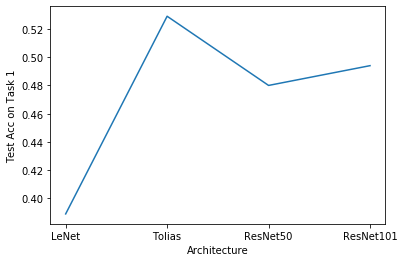

In [10]:
plt.plot(backbone_names[:-1], accs_across_backbones)
plt.xlabel("Architecture")
plt.ylabel("Test Acc on Task 1")
plt.show()